# keras-nn-tutorial

Basic tutorial for training feed-forward neural networks with the Keras library. This tutorial is an extension of: https://github.com/HelgiHelgason/genetic-nn-tutorial

Dependencies are Tensorflow and Keras:

pip install tensorflow
pip install keras

Keras is a high-level deep learning library that takes care of loading Tensorflow by itself, to Tensorflow is never explicitly used in this code. Keras also works with other back-ends than Tensorflow.


In [1]:
# Note that we only have very basic dependencies
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [2]:
# Our dataset
dataset = []

# Where to start the X's
x_runner = -4.0
increment = 0.01
number_of_samples = 800

# Generate the dataset, we're going to learn the cos(x) function
for i in range(number_of_samples):
    dataset.append([x_runner, math.cos(x_runner)])
    x_runner += increment

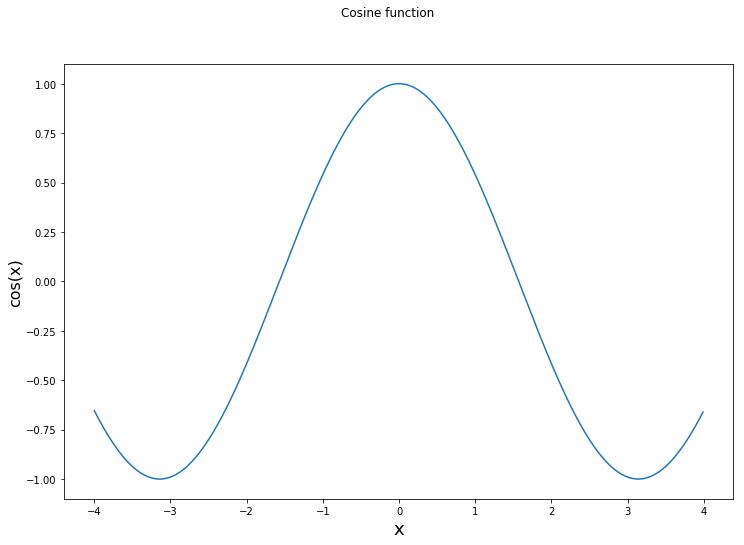

In [3]:
# Plot the whole dataset
fig = plt.figure(figsize=(12, 8))
plt.plot(list(item[0] for item in dataset), list(item[1] for item in dataset))
fig.suptitle('Cosine function')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


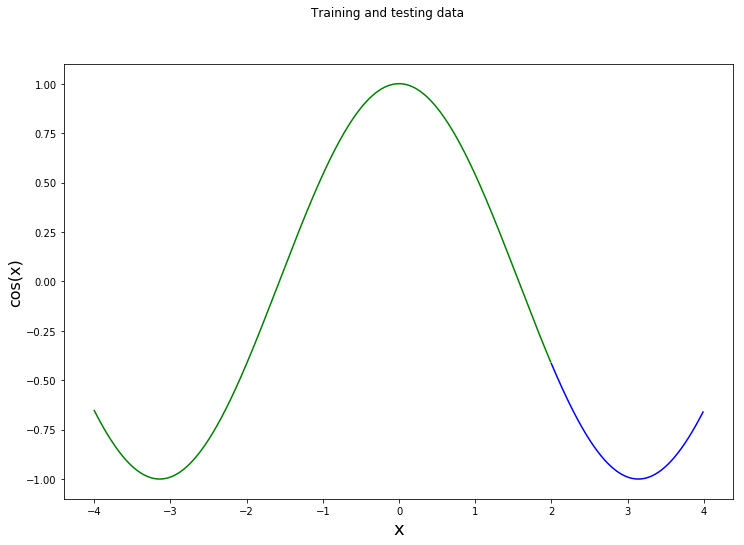

In [4]:
# Split into training and testing sets
training_dataset = dataset[:600]
testing_dataset = dataset[-200:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data')
plt.plot(x_training, y_training, color='green')
plt.plot(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


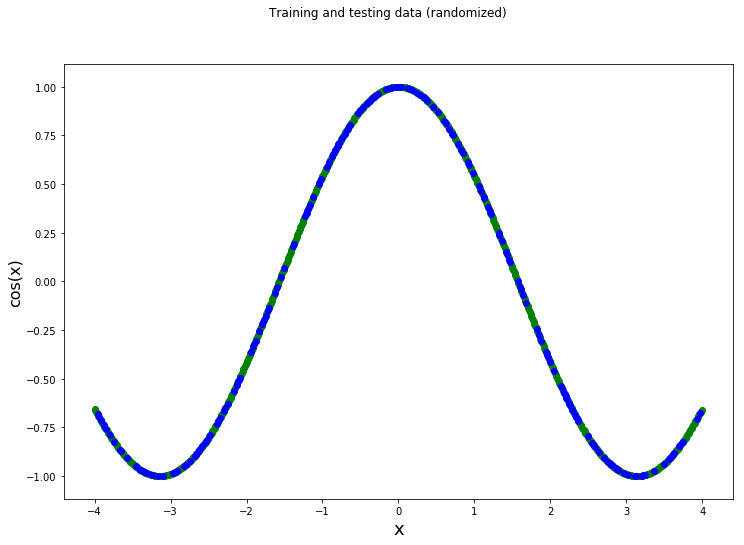

In [5]:
# Shuffle the dataset to make the training and testing sets more evenly distributed
random.shuffle(dataset)

# Redo the split
# Split into training and testing sets
training_dataset = dataset[:600]
testing_dataset = dataset[-200:]
# Training inputs
x_training = list(item[0] for item in training_dataset)
# Training outputs
y_training = list(item[1] for item in training_dataset)
# Testing inputs
x_testing = list(item[0] for item in testing_dataset)
# Testing outputs
y_testing = list(item[1] for item in testing_dataset)

# Normalize X values
for i in range(len(x_training)):
    x_training[i] = x_training[i] / (200*increment - 100*increment)

for i in range(len(x_testing)):
    x_testing[i] = x_testing[i] / (200*increment - 100*increment)


# Plot training and testing datasets
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Training and testing data (randomized)')
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.xlabel('x', fontsize=18)
plt.ylabel('cos(x)', fontsize=16)
plt.show()


In [6]:
# Create our model. Sequential means that we will gradually add things to our model, from input to output.
model = Sequential()

# We need to add our hidden layer. Like before, we use RELU and have only one input. 
# Dense is a type neural network layer that is fully connected to the inputs.
# Note that the input layer is implicitly created.
model.add(Dense(units=20, activation='relu', input_dim=1))

# Then we create our output layer. It uses linear activitation like before.
model.add(Dense(units=1, activation='linear'))

# With all layers in place, Keras will compile the model and make it ready for use.
# We will use a stochastic gradient descent (SGD) optimizer and use mean-squared error (MSE) to 
# measure model quality. Note that the previous tutorial used sum-squared error (SSE).
# They are very similar but Keras does not support SSE.
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# Here we perform the model training/learning.
model.fit(x_training, y_training, epochs=2000, batch_size=16)

Epoch 1/2000
600/600 [==============================] - 0s 267us/step - loss: 0.7665 - acc: 0.0000e+00
Epoch 2/2000
600/600 [==============================] - 0s 72us/step - loss: 0.4080 - acc: 0.0000e+00
Epoch 3/2000
600/600 [==============================] - 0s 70us/step - loss: 0.3057 - acc: 0.0000e+00
Epoch 4/2000
600/600 [==============================] - 0s 70us/step - loss: 0.2535 - acc: 0.0000e+00
Epoch 5/2000
600/600 [==============================] - 0s 80us/step - loss: 0.2086 - acc: 0.0000e+00
Epoch 6/2000
600/600 [==============================] - 0s 77us/step - loss: 0.1683 - acc: 0.0000e+00
Epoch 7/2000
600/600 [==============================] - 0s 100us/step - loss: 0.1333 - acc: 0.0000e+00
Epoch 8/2000
600/600 [==============================] - 0s 108us/step - loss: 0.1089 - acc: 0.0000e+00
Epoch 9/2000
600/600 [==============================] - 0s 109us/step - loss: 0.0894 - acc: 0.0000e+00
Epoch 10/2000
600/600 [==============================] - 0s 67us/step - loss: 

600/600 [==============================] - 0s 70us/step - loss: 0.0225 - acc: 0.0017
Epoch 166/2000
600/600 [==============================] - 0s 66us/step - loss: 0.0219 - acc: 0.0017
Epoch 167/2000
600/600 [==============================] - 0s 80us/step - loss: 0.0211 - acc: 0.0017
Epoch 168/2000
600/600 [==============================] - 0s 75us/step - loss: 0.0216 - acc: 0.0017
Epoch 169/2000
600/600 [==============================] - 0s 87us/step - loss: 0.0209 - acc: 0.0017
Epoch 170/2000
600/600 [==============================] - 0s 64us/step - loss: 0.0208 - acc: 0.0017
Epoch 171/2000
600/600 [==============================] - 0s 79us/step - loss: 0.0213 - acc: 0.0017
Epoch 172/2000
600/600 [==============================] - 0s 81us/step - loss: 0.0218 - acc: 0.0017
Epoch 173/2000
600/600 [==============================] - 0s 65us/step - loss: 0.0204 - acc: 0.0017
Epoch 174/2000
600/600 [==============================] - 0s 82us/step - loss: 0.0204 - acc: 0.0017
Epoch 175/2000


600/600 [==============================] - 0s 71us/step - loss: 0.0039 - acc: 0.0017
Epoch 328/2000
600/600 [==============================] - 0s 53us/step - loss: 0.0037 - acc: 0.0017
Epoch 329/2000
600/600 [==============================] - 0s 67us/step - loss: 0.0035 - acc: 0.0017   
Epoch 330/2000
600/600 [==============================] - 0s 95us/step - loss: 0.0037 - acc: 0.0017
Epoch 331/2000
600/600 [==============================] - 0s 73us/step - loss: 0.0035 - acc: 0.0017
Epoch 332/2000
600/600 [==============================] - 0s 82us/step - loss: 0.0035 - acc: 0.0017
Epoch 333/2000
600/600 [==============================] - 0s 70us/step - loss: 0.0034 - acc: 0.0017
Epoch 334/2000
600/600 [==============================] - 0s 70us/step - loss: 0.0035 - acc: 0.0017
Epoch 335/2000
600/600 [==============================] - 0s 61us/step - loss: 0.0034 - acc: 0.0017
Epoch 336/2000
600/600 [==============================] - 0s 59us/step - loss: 0.0034 - acc: 0.0017
Epoch 337/20

600/600 [==============================] - 0s 72us/step - loss: 0.0010 - acc: 0.0017
Epoch 489/2000
600/600 [==============================] - 0s 68us/step - loss: 0.0011 - acc: 0.0017   
Epoch 490/2000
600/600 [==============================] - 0s 93us/step - loss: 0.0011 - acc: 0.0017
Epoch 491/2000
600/600 [==============================] - 0s 76us/step - loss: 9.7445e-04 - acc: 0.0017
Epoch 492/2000
600/600 [==============================] - 0s 84us/step - loss: 0.0011 - acc: 0.0017
Epoch 493/2000
600/600 [==============================] - 0s 77us/step - loss: 0.0011 - acc: 0.0017
Epoch 494/2000
600/600 [==============================] - 0s 81us/step - loss: 9.7266e-04 - acc: 0.0017
Epoch 495/2000
600/600 [==============================] - 0s 106us/step - loss: 9.7047e-04 - acc: 0.0017
Epoch 496/2000
600/600 [==============================] - 0s 74us/step - loss: 0.0010 - acc: 0.0017   
Epoch 497/2000
600/600 [==============================] - 0s 96us/step - loss: 0.0011 - acc: 0.0

600/600 [==============================] - 0s 60us/step - loss: 3.4583e-04 - acc: 0.0017
Epoch 645/2000
600/600 [==============================] - 0s 77us/step - loss: 5.1622e-04 - acc: 0.0017
Epoch 646/2000
600/600 [==============================] - 0s 62us/step - loss: 4.2963e-04 - acc: 0.0017
Epoch 647/2000
600/600 [==============================] - 0s 97us/step - loss: 4.7933e-04 - acc: 0.0017
Epoch 648/2000
600/600 [==============================] - 0s 129us/step - loss: 3.9593e-04 - acc: 0.0017
Epoch 649/2000
600/600 [==============================] - 0s 95us/step - loss: 3.9502e-04 - acc: 0.0017
Epoch 650/2000
600/600 [==============================] - 0s 83us/step - loss: 4.0947e-04 - acc: 0.0017
Epoch 651/2000
600/600 [==============================] - 0s 79us/step - loss: 3.1522e-04 - acc: 0.0017
Epoch 652/2000
600/600 [==============================] - 0s 82us/step - loss: 3.1771e-04 - acc: 0.0017
Epoch 653/2000
600/600 [==============================] - 0s 106us/step - loss

600/600 [==============================] - 0s 106us/step - loss: 1.6986e-04 - acc: 0.0017
Epoch 801/2000
600/600 [==============================] - 0s 103us/step - loss: 1.8272e-04 - acc: 0.0017
Epoch 802/2000
600/600 [==============================] - 0s 83us/step - loss: 1.9012e-04 - acc: 0.0017
Epoch 803/2000
600/600 [==============================] - 0s 75us/step - loss: 2.0930e-04 - acc: 0.0017
Epoch 804/2000
600/600 [==============================] - 0s 95us/step - loss: 1.9438e-04 - acc: 0.0017
Epoch 805/2000
600/600 [==============================] - 0s 121us/step - loss: 2.5271e-04 - acc: 0.0017
Epoch 806/2000
600/600 [==============================] - 0s 98us/step - loss: 1.9766e-04 - acc: 0.0017
Epoch 807/2000
600/600 [==============================] - 0s 70us/step - loss: 2.6314e-04 - acc: 0.0017
Epoch 808/2000
600/600 [==============================] - 0s 66us/step - loss: 3.1213e-04 - acc: 0.0017
Epoch 809/2000
600/600 [==============================] - 0s 72us/step - los

600/600 [==============================] - 0s 82us/step - loss: 1.1668e-04 - acc: 0.0017
Epoch 957/2000
600/600 [==============================] - 0s 86us/step - loss: 1.1674e-04 - acc: 0.0017
Epoch 958/2000
600/600 [==============================] - 0s 85us/step - loss: 1.5422e-04 - acc: 0.0017
Epoch 959/2000
600/600 [==============================] - 0s 64us/step - loss: 1.6069e-04 - acc: 0.0017
Epoch 960/2000
600/600 [==============================] - 0s 66us/step - loss: 1.3587e-04 - acc: 0.0017
Epoch 961/2000
600/600 [==============================] - 0s 84us/step - loss: 1.2548e-04 - acc: 0.0017
Epoch 962/2000
600/600 [==============================] - 0s 70us/step - loss: 1.5061e-04 - acc: 0.0017
Epoch 963/2000
600/600 [==============================] - 0s 74us/step - loss: 1.6374e-04 - acc: 0.0017
Epoch 964/2000
600/600 [==============================] - 0s 81us/step - loss: 1.4168e-04 - acc: 0.0017
Epoch 965/2000
600/600 [==============================] - 0s 70us/step - loss: 

600/600 [==============================] - 0s 86us/step - loss: 1.4924e-04 - acc: 0.0017
Epoch 1113/2000
600/600 [==============================] - 0s 61us/step - loss: 2.0196e-04 - acc: 0.0017
Epoch 1114/2000
600/600 [==============================] - 0s 83us/step - loss: 1.7660e-04 - acc: 0.0017
Epoch 1115/2000
600/600 [==============================] - 0s 71us/step - loss: 1.3645e-04 - acc: 0.0017
Epoch 1116/2000
600/600 [==============================] - 0s 63us/step - loss: 9.9613e-05 - acc: 0.0017
Epoch 1117/2000
600/600 [==============================] - 0s 78us/step - loss: 1.1007e-04 - acc: 0.0017
Epoch 1118/2000
600/600 [==============================] - 0s 95us/step - loss: 9.4909e-05 - acc: 0.0017
Epoch 1119/2000
600/600 [==============================] - 0s 95us/step - loss: 1.0543e-04 - acc: 0.0017 ETA: 0s - loss: 1.0878e-04 - acc: 0.0018   
Epoch 1120/2000
600/600 [==============================] - 0s 81us/step - loss: 1.0271e-04 - acc: 0.0017
Epoch 1121/2000
600/600 [==

600/600 [==============================] - 0s 62us/step - loss: 1.1684e-04 - acc: 0.0017
Epoch 1268/2000
600/600 [==============================] - 0s 78us/step - loss: 9.8617e-05 - acc: 0.0017
Epoch 1269/2000
600/600 [==============================] - 0s 111us/step - loss: 8.9798e-05 - acc: 0.0017
Epoch 1270/2000
600/600 [==============================] - 0s 66us/step - loss: 1.1308e-04 - acc: 0.0017
Epoch 1271/2000
600/600 [==============================] - 0s 75us/step - loss: 9.1897e-05 - acc: 0.0017
Epoch 1272/2000
600/600 [==============================] - 0s 81us/step - loss: 8.4469e-05 - acc: 0.0017
Epoch 1273/2000
600/600 [==============================] - 0s 112us/step - loss: 1.0464e-04 - acc: 0.0017
Epoch 1274/2000
600/600 [==============================] - 0s 69us/step - loss: 9.5918e-05 - acc: 0.0017
Epoch 1275/2000
600/600 [==============================] - 0s 93us/step - loss: 1.5749e-04 - acc: 0.0017
Epoch 1276/2000
600/600 [==============================] - 0s 71us/st

600/600 [==============================] - 0s 99us/step - loss: 1.9274e-04 - acc: 0.0017
Epoch 1423/2000
600/600 [==============================] - 0s 86us/step - loss: 1.0829e-04 - acc: 0.0017
Epoch 1424/2000
600/600 [==============================] - 0s 85us/step - loss: 9.2892e-05 - acc: 0.0017
Epoch 1425/2000
600/600 [==============================] - 0s 76us/step - loss: 1.0241e-04 - acc: 0.0017
Epoch 1426/2000
600/600 [==============================] - 0s 66us/step - loss: 9.7659e-05 - acc: 0.0017
Epoch 1427/2000
600/600 [==============================] - 0s 78us/step - loss: 8.0405e-05 - acc: 0.0017
Epoch 1428/2000
600/600 [==============================] - 0s 105us/step - loss: 9.6876e-05 - acc: 0.0017
Epoch 1429/2000
600/600 [==============================] - 0s 62us/step - loss: 1.0555e-04 - acc: 0.0017
Epoch 1430/2000
600/600 [==============================] - 0s 87us/step - loss: 9.5939e-05 - acc: 0.0017
Epoch 1431/2000
600/600 [==============================] - 0s 83us/ste

600/600 [==============================] - 0s 55us/step - loss: 9.3385e-05 - acc: 0.0017
Epoch 1501/2000
600/600 [==============================] - 0s 65us/step - loss: 1.5420e-04 - acc: 0.0017
Epoch 1502/2000
600/600 [==============================] - 0s 72us/step - loss: 3.5272e-04 - acc: 0.0017
Epoch 1503/2000
600/600 [==============================] - 0s 61us/step - loss: 9.4330e-05 - acc: 0.0017
Epoch 1504/2000
600/600 [==============================] - 0s 69us/step - loss: 8.1146e-05 - acc: 0.0017
Epoch 1505/2000
600/600 [==============================] - 0s 68us/step - loss: 9.5125e-05 - acc: 0.0017
Epoch 1506/2000
600/600 [==============================] - 0s 64us/step - loss: 8.2175e-05 - acc: 0.0017
Epoch 1507/2000
600/600 [==============================] - 0s 69us/step - loss: 1.0404e-04 - acc: 0.0017
Epoch 1508/2000
600/600 [==============================] - 0s 61us/step - loss: 1.0053e-04 - acc: 0.0017
Epoch 1509/2000
600/600 [==============================] - 0s 69us/step

600/600 [==============================] - 0s 58us/step - loss: 9.1253e-05 - acc: 0.0017
Epoch 1657/2000
600/600 [==============================] - 0s 79us/step - loss: 1.0121e-04 - acc: 0.0017
Epoch 1658/2000
600/600 [==============================] - 0s 58us/step - loss: 7.4440e-05 - acc: 0.0017
Epoch 1659/2000
600/600 [==============================] - 0s 70us/step - loss: 1.4235e-04 - acc: 0.0017
Epoch 1660/2000
600/600 [==============================] - 0s 53us/step - loss: 1.1104e-04 - acc: 0.0017
Epoch 1661/2000
600/600 [==============================] - 0s 62us/step - loss: 1.1213e-04 - acc: 0.0017
Epoch 1662/2000
600/600 [==============================] - 0s 66us/step - loss: 1.0385e-04 - acc: 0.0017
Epoch 1663/2000
600/600 [==============================] - 0s 67us/step - loss: 8.0578e-05 - acc: 0.0017
Epoch 1664/2000
600/600 [==============================] - 0s 71us/step - loss: 9.8338e-05 - acc: 0.0017
Epoch 1665/2000
600/600 [==============================] - 0s 62us/step

600/600 [==============================] - 0s 81us/step - loss: 1.0044e-04 - acc: 0.0017
Epoch 1813/2000
600/600 [==============================] - 0s 61us/step - loss: 9.0211e-05 - acc: 0.0017
Epoch 1814/2000
600/600 [==============================] - 0s 78us/step - loss: 8.2538e-05 - acc: 0.0017
Epoch 1815/2000
600/600 [==============================] - 0s 80us/step - loss: 7.5086e-05 - acc: 0.0017
Epoch 1816/2000
600/600 [==============================] - 0s 82us/step - loss: 9.1894e-05 - acc: 0.0017
Epoch 1817/2000
600/600 [==============================] - 0s 81us/step - loss: 9.3846e-05 - acc: 0.0017
Epoch 1818/2000
600/600 [==============================] - 0s 75us/step - loss: 9.2908e-05 - acc: 0.0017
Epoch 1819/2000
600/600 [==============================] - 0s 74us/step - loss: 1.1142e-04 - acc: 0.0017
Epoch 1820/2000
600/600 [==============================] - 0s 100us/step - loss: 8.7564e-05 - acc: 0.0017
Epoch 1821/2000
600/600 [==============================] - 0s 130us/st

600/600 [==============================] - 0s 100us/step - loss: 7.6698e-05 - acc: 0.0017
Epoch 1891/2000
600/600 [==============================] - 0s 85us/step - loss: 8.3153e-05 - acc: 0.0017
Epoch 1892/2000
600/600 [==============================] - 0s 94us/step - loss: 6.4863e-05 - acc: 0.0017
Epoch 1893/2000
600/600 [==============================] - 0s 75us/step - loss: 1.0502e-04 - acc: 0.0017
Epoch 1894/2000
600/600 [==============================] - 0s 61us/step - loss: 1.3962e-04 - acc: 0.0017
Epoch 1895/2000
600/600 [==============================] - 0s 79us/step - loss: 1.0056e-04 - acc: 0.0017
Epoch 1896/2000
600/600 [==============================] - 0s 116us/step - loss: 7.1079e-05 - acc: 0.0017
Epoch 1897/2000
600/600 [==============================] - 0s 110us/step - loss: 1.3041e-04 - acc: 0.0017
Epoch 1898/2000
600/600 [==============================] - 0s 92us/step - loss: 9.7436e-05 - acc: 0.0017
Epoch 1899/2000
600/600 [==============================] - 0s 82us/s

Epoch 1968/2000
600/600 [==============================] - 0s 222us/step - loss: 7.3885e-05 - acc: 0.0017
Epoch 1969/2000
600/600 [==============================] - 0s 97us/step - loss: 7.5769e-05 - acc: 0.0017
Epoch 1970/2000
600/600 [==============================] - 0s 76us/step - loss: 7.0561e-05 - acc: 0.0017
Epoch 1971/2000
600/600 [==============================] - 0s 74us/step - loss: 6.8677e-05 - acc: 0.0017
Epoch 1972/2000
600/600 [==============================] - 0s 80us/step - loss: 8.4145e-05 - acc: 0.0017
Epoch 1973/2000
600/600 [==============================] - 0s 76us/step - loss: 7.8293e-05 - acc: 0.0017
Epoch 1974/2000
600/600 [==============================] - 0s 75us/step - loss: 1.0661e-04 - acc: 0.0017
Epoch 1975/2000
600/600 [==============================] - 0s 81us/step - loss: 1.0757e-04 - acc: 0.0017
Epoch 1976/2000
600/600 [==============================] - 0s 86us/step - loss: 9.2192e-05 - acc: 0.0017
Epoch 1977/2000
600/600 [=============================

In [9]:
# Now lets apply the trained model to the both training and testing data.
y_training_results = model.predict(x_training)
y_testing_results = model.predict(x_testing)

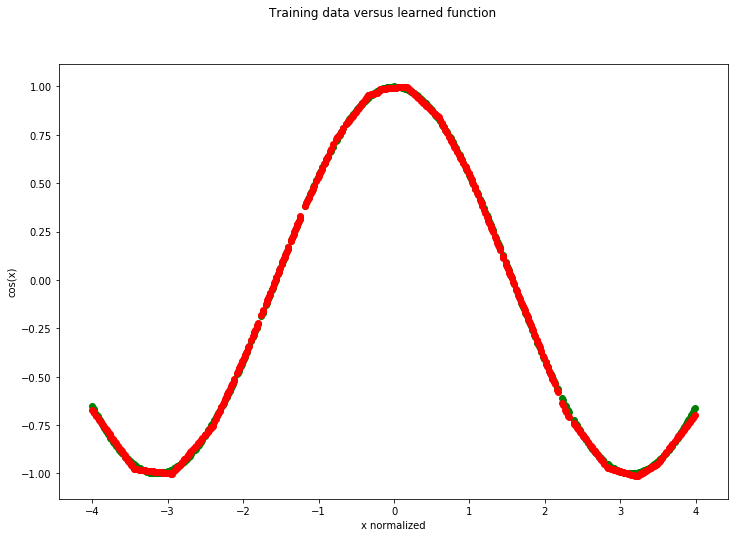

In [10]:
# Plot function currently learned
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_training, y_training_results, color='red')
fig.suptitle('Training data versus learned function')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()

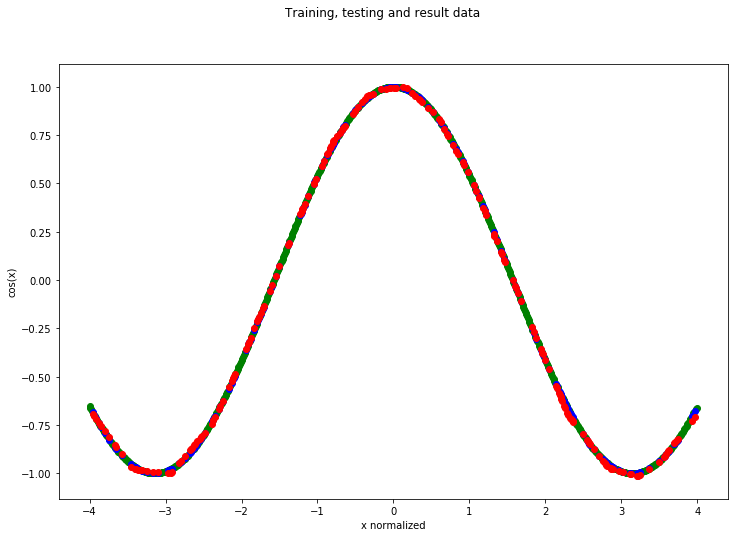

In [11]:
# Plot results vs "ground truth"# Plot re 
fig = plt.figure(figsize=(12, 8))
plt.scatter(x_training, y_training, color='green')
plt.scatter(x_testing, y_testing, color='blue')
plt.scatter(x_testing, y_testing_results, color='red')
fig.suptitle('Training, testing and result data')
plt.ylabel('cos(x)')
plt.xlabel('x normalized')
plt.show()